In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [113]:
Integration = pd.read_csv('../../Data/study/03.통합_정규화.csv')
Integration.tail(17)
# 0.25가 젤 높은 군집이고 0.50이 두번째로 높은 군집 얘네는 별로 위험이 아님.
# 0.75가 세번째로 낮은 애들인데 뭐 거의 차이가 없다고 본다.
# 0.0 나오는 애들이 두번째로 낮은 애들인데 별 차이없음.
# 1 나오는 애들이 제일 낮은 지역임.
# 구분을 해보자. 0.25 = "위험없음", 0.50 = "양호", 0.75 = "소멸경고", 0.0 = "소멸위기", 1 = 소멸진행(근데 세종만 1임)

,시점,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
119,2013,경기도,0.910380,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.013776,0.25
120,2013,서울특별시,0.753220,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.592332,0.50
121,2013,부산광역시,0.255958,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.064875,0.75
122,2013,경상남도,0.241390,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.005956,0.75
123,2013,인천광역시,0.207265,0.215566,0.217549,0.170483,0.197767,0.176916,0.082833,0.033262,0.75
124,2013,경상북도,0.193710,0.160416,0.187705,0.139949,0.168028,0.138730,0.035957,0.037772,0.75
125,2013,대구광역시,0.178840,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.040335,0.75
126,2013,충청남도,0.144720,0.128457,0.155867,0.114504,0.143087,0.115372,0.033184,0.018502,0.00
127,2013,전라남도,0.134163,0.117580,0.127153,0.055980,0.120783,0.094549,0.018707,0.025479,0.00
128,2013,전라북도,0.131592,0.124568,0.119626,0.127226,0.128558,0.103780,0.027867,0.016236,0.00


In [114]:
Integration.loc[Integration['cluster'] == 0.25,"위험지수"] = '위험없음'
Integration.loc[Integration['cluster'] == 0.50,"위험지수"] = '양호'
Integration.loc[Integration['cluster'] == 0.75,"위험지수"] = '소멸경고'
Integration.loc[Integration['cluster'] == 0.00,"위험지수"] = '소멸위기'
Integration.loc[Integration['cluster'] == 1.00,"위험지수"] = '소멸진행'

In [115]:
Integration

,시점,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,위험지수
0,2020,경기도,1.000000,1.000000,0.681823,0.669211,0.989493,1.000000,0.576734,0.026286,0.25,위험없음
1,2020,서울특별시,0.717506,0.826711,0.412283,0.974555,0.527691,0.783734,1.000000,1.000000,0.50,양호
2,2020,부산광역시,0.245759,0.249388,0.124101,0.165394,0.192010,0.223664,0.179294,0.111145,0.75,소멸경고
3,2020,경상남도,0.241871,0.205622,0.139806,0.145038,0.240947,0.187088,0.111240,0.009975,0.75,소멸경고
4,2020,인천광역시,0.212003,0.226092,0.132839,0.147583,0.196469,0.203894,0.137688,0.056396,0.75,소멸경고
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2013,대전광역시,0.106026,0.109410,0.115568,0.127226,0.113168,0.100671,0.029611,0.025211,0.00,소멸위기
132,2013,광주광역시,0.101524,0.108771,0.103378,0.109415,0.116652,0.094325,0.028538,0.018596,0.00,소멸위기
133,2013,울산광역시,0.077741,0.072153,0.090929,0.073791,0.078759,0.052201,0.023670,0.014746,0.00,소멸위기
134,2013,제주특별자치도,0.035450,0.033477,0.037523,0.048346,0.040838,0.035189,0.006765,0.000000,0.00,소멸위기


In [116]:
Integration.columns

Index(['시점', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액', 'cluster', '위험지수'],
      dtype='object')

In [117]:
Integration.cluster.unique()
# 1 소멸진행, 0.75 소멸위기, 0.5 소멸위기 0.25 소멸양호 0 소멸무관

array([0.25, 0.5 , 0.75, 0.  , 1.  ])

> Feature data 

In [118]:
# Feature
fish_input = Integration[['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액']].to_numpy()
fish_input[:5]

array([[1.        , 1.        , 0.68182304, 0.6692112 , 0.98949327,
        1.        , 0.57673416, 0.02628575],
       [0.71750558, 0.82671082, 0.41228289, 0.97455471, 0.52769146,
        0.7837338 , 1.        , 1.        ],
       [0.24575928, 0.24938779, 0.1241013 , 0.1653944 , 0.19200974,
        0.22366428, 0.17929408, 0.11114458],
       [0.24187122, 0.20562189, 0.13980638, 0.14503817, 0.24094675,
        0.18708844, 0.1112403 , 0.00997535],
       [0.21200334, 0.22609175, 0.13283919, 0.1475827 , 0.19646917,
        0.20389356, 0.13768769, 0.05639608]])

> Target data 

In [119]:
# Target
fish_target = Integration['위험지수'].to_numpy()
fish_target

array(['위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기

> test train 분리

In [120]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(fish_input,fish_target,random_state=42)

> 표준화

In [121]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

---
### 로지스틱 회귀로 다중 분류 수행하기

In [122]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print("Train :", lr.score(train_scaled,train_target))
print("Test :", lr.score(test_scaled,test_target))

Train : 1.0
Test : 1.0


In [123]:
# test data로 예측
lr.predict(test_scaled[:5])

array(['소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기'], dtype=object)

In [124]:
# test data로 확률
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.891, 0.106, 0.002, 0.   , 0.   ],
       [0.002, 0.996, 0.003, 0.   , 0.   ],
       [0.029, 0.968, 0.004, 0.   , 0.   ],
       [0.008, 0.986, 0.006, 0.   , 0.   ],
       [0.04 , 0.958, 0.002, 0.   , 0.   ]])

In [125]:
lr.classes_

array(['소멸경고', '소멸위기', '소멸진행', '양호', '위험없음'], dtype=object)

In [126]:
# 사용된 다중 공식 확인
print(lr.coef_, lr.intercept_)

[[ 2.97977446  0.87110328  0.65271374  1.64312495  0.65833326  0.90367854
  -0.12220532  0.98189876]
 [-3.70572964 -1.94483607 -1.80063909 -2.89258705 -1.39835992 -1.99445755
  -1.74252606 -6.39249425]
 [-2.34888953 -2.08614815 -2.00956359 -1.91117829 -2.3132508  -2.03361426
  -0.92700066  3.63269787]
 [ 1.17372345  1.37133962  1.30173736  1.93485125  0.8860586   1.38368025
   1.78763189  2.11240629]
 [ 1.90112126  1.78854133  1.85575157  1.22578915  2.16721885  1.74071302
   1.00410016 -0.33450868]] [ 6.02891746 -1.27705913 -2.89092024 -0.69373879 -1.1671993 ]


---
### 확률 분포 검증

In [127]:
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions, decimals=2)

array([[ 4.75,  2.62, -1.29, -3.  , -3.08],
       [ 2.01,  8.49,  2.59, -6.26, -6.82],
       [ 3.  ,  6.52,  0.95, -5.04, -5.44],
       [ 2.46,  7.26,  2.13, -5.74, -6.11],
       [ 3.17,  6.35,  0.37, -4.87, -5.02]])

In [128]:
from scipy.special import softmax
proba = softmax(decisions, axis=1)
np.round(proba, decimals=3)

array([[0.891, 0.106, 0.002, 0.   , 0.   ],
       [0.002, 0.996, 0.003, 0.   , 0.   ],
       [0.029, 0.968, 0.004, 0.   , 0.   ],
       [0.008, 0.986, 0.006, 0.   , 0.   ],
       [0.04 , 0.958, 0.002, 0.   , 0.   ]])

In [129]:
lr.classes_

array(['소멸경고', '소멸위기', '소멸진행', '양호', '위험없음'], dtype=object)

In [130]:
ans = lr.predict(test_scaled)
ans = pd.DataFrame(ans)
ans

,0
0,소멸경고
1,소멸위기
2,소멸위기
3,소멸위기
4,소멸위기
5,소멸위기
6,소멸위기
7,소멸위기
8,소멸경고
9,소멸위기


In [131]:
# plt.semilogy(train_input.년도, train_target)

In [132]:
Integration

,시점,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,위험지수
0,2020,경기도,1.000000,1.000000,0.681823,0.669211,0.989493,1.000000,0.576734,0.026286,0.25,위험없음
1,2020,서울특별시,0.717506,0.826711,0.412283,0.974555,0.527691,0.783734,1.000000,1.000000,0.50,양호
2,2020,부산광역시,0.245759,0.249388,0.124101,0.165394,0.192010,0.223664,0.179294,0.111145,0.75,소멸경고
3,2020,경상남도,0.241871,0.205622,0.139806,0.145038,0.240947,0.187088,0.111240,0.009975,0.75,소멸경고
4,2020,인천광역시,0.212003,0.226092,0.132839,0.147583,0.196469,0.203894,0.137688,0.056396,0.75,소멸경고
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2013,대전광역시,0.106026,0.109410,0.115568,0.127226,0.113168,0.100671,0.029611,0.025211,0.00,소멸위기
132,2013,광주광역시,0.101524,0.108771,0.103378,0.109415,0.116652,0.094325,0.028538,0.018596,0.00,소멸위기
133,2013,울산광역시,0.077741,0.072153,0.090929,0.073791,0.078759,0.052201,0.023670,0.014746,0.00,소멸위기
134,2013,제주특별자치도,0.035450,0.033477,0.037523,0.048346,0.040838,0.035189,0.006765,0.000000,0.00,소멸위기


---
### RandomForest

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons

In [134]:
from sklearn.model_selection import train_test_split
rx_train, rx_test, ry_train, ry_test = train_test_split(Integration[['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액']],Integration.cluster,
random_state=0)
forest = RandomForestRegressor(n_estimators=100, random_state=0)

forest.fit(rx_train,ry_train)
print("훈련 세트 정확도: {:3f}".format(forest.score(rx_train,ry_train)))
print("테스트 세트 정확도: {:3f}".format(forest.score(rx_test,ry_test)))

훈련 세트 정확도: 0.997318
테스트 세트 정확도: 0.932277


---
### 년도를 피쳐에 넣고 해보자

In [135]:
# Feature
fish_input = Integration[['시점','총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액']].to_numpy()
fish_input[16:22]

array([[2.02000000e+03, 1.75633552e-02, 2.57987192e-02, 2.09727363e-02,
        1.27226463e-02, 2.93671835e-02, 1.49077632e-02, 1.02739262e-02,
        2.79119685e-01],
       [2.01900000e+03, 9.85918831e-01, 9.09652174e-01, 7.30415362e-01,
        6.66666667e-01, 1.00000000e+00, 8.33463544e-01, 5.16812369e-01,
        2.69120476e-02],
       [2.01900000e+03, 7.22063462e-01, 7.41952882e-01, 4.67700028e-01,
        9.89821883e-01, 5.44418570e-01, 6.77163220e-01, 8.83203106e-01,
        8.80479490e-01],
       [2.01900000e+03, 2.47404915e-01, 2.13270597e-01, 1.41817341e-01,
        1.65394402e-01, 1.94713461e-01, 2.09553724e-01, 1.62625961e-01,
        9.89753859e-02],
       [2.01900000e+03, 2.43550083e-01, 1.98290581e-01, 1.61401979e-01,
        1.42493639e-01, 2.45872965e-01, 1.75066567e-01, 1.04743034e-01,
        9.46086608e-03],
       [2.01900000e+03, 2.13070471e-01, 2.06817362e-01, 1.54924188e-01,
        1.45038168e-01, 2.01615674e-01, 1.81763102e-01, 1.23980186e-01,
        5.0

In [136]:
# Target
fish_target = Integration['위험지수'].to_numpy()
fish_target

array(['위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기

In [137]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(fish_input,fish_target,random_state=42)

> 표준화

In [138]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [139]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print("Train :", lr.score(train_scaled,train_target))
print("Test :", lr.score(test_scaled,test_target))

Train : 1.0
Test : 1.0


In [140]:
# test data로 예측
lr.predict(test_scaled[:5])

array(['소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기'], dtype=object)

In [141]:
# test data로 확률
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.891, 0.106, 0.003, 0.   , 0.   ],
       [0.001, 0.998, 0.001, 0.   , 0.   ],
       [0.028, 0.97 , 0.002, 0.   , 0.   ],
       [0.008, 0.99 , 0.002, 0.   , 0.   ],
       [0.042, 0.948, 0.01 , 0.   , 0.   ]])

In [142]:
lr.classes_

array(['소멸경고', '소멸위기', '소멸진행', '양호', '위험없음'], dtype=object)

In [143]:
# test data로 확률
proba = lr.predict_proba([[2.01900000e+03, 2.75633552e-02, 2.57987192e-02, 2.09727363e-02,
        2.27226463e-02, 2.93671835e-02, 2.49077632e-02, 2.02739262e-02,
        2.79119685e-01]])
np.round(proba, decimals=3)

array([[0., 1., 0., 0., 0.]])

---
### LinearRegression

In [144]:
kop = pd.read_csv("../../Data/03.통합.csv")
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4


> KMeans 구하기

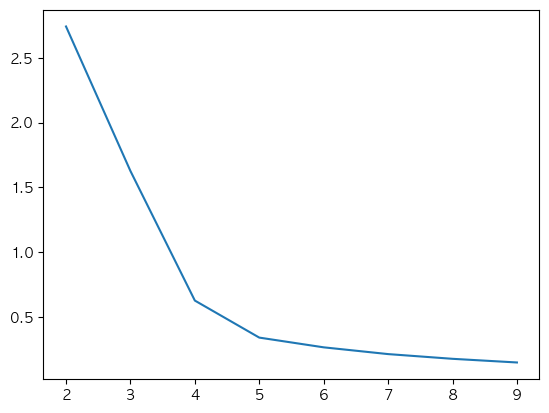

In [320]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
data = kop[kop.loc[:,["전출인구","산부인과의원수","초등학생인원수","도매 및 소매업 신생"]].columns]
    # 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(data_scale)
    scores.append(km.inertia_)
plt.plot(range(2,10),scores)
plt.show()

In [321]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)
print(k)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
kop['cluster'] = model.fit_predict(data_scale)

4


In [147]:
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,1
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,3
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,3
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,3
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,3


4


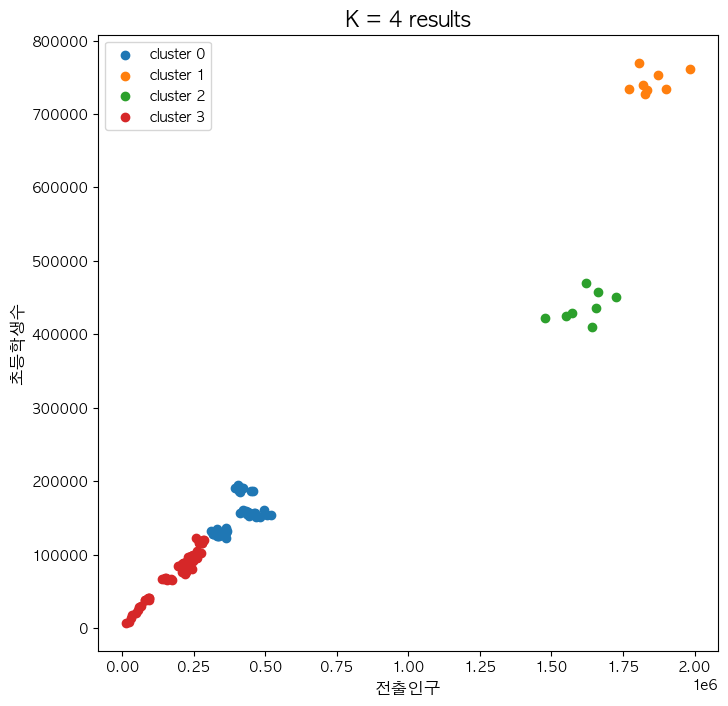

In [322]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(kop.loc[kop['cluster'] == i, '전출인구'], kop.loc[kop['cluster'] == i, '초등학생인원수'], 
                label = 'cluster ' + str(i))
print(k)
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('전출인구', size = 12)
plt.ylabel('초등학생수', size = 12)
plt.show()

In [336]:
kop['cluster'] = kop['cluster'] + 10
kop_temp = kop.sort_values(by="전출인구", ascending=True)
temp_list = kop_temp['cluster'].unique()
i = 3
for temp in temp_list:
    kop['cluster'][kop['cluster'] == temp] = i
    i-=1
kop['cluster'] = np.round(kop['cluster'] / 3, 2)
kop['cluster'].unique()

array([0.  , 0.33, 0.67, 1.  ])

In [150]:
kop.head(12)

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67
5,2013,인천광역시,2879782,439578,25560,69,157918,11522,62378.3,31197.4,0.67
6,2013,전라북도,1872965,260395,14555,52,105135,6935,22597.6,15924.7,1.00
7,2013,경상북도,2699440,330983,22206,57,135237,9127,28452.3,35242.6,0.67
8,2013,광주광역시,1472910,229288,12729,45,96055,6342,23082.8,18041.6,1.00
9,2013,충청남도,2047631,268053,18628,47,116216,7662,26445.4,17957.6,1.00


In [151]:
kop[kop["시도"]=="전라남도"]

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
10,2013,전라남도,1907172,246635,15401,24,99206,6356,15968.2,24216.2,1.0
27,2014,전라남도,1905780,260874,14817,23,95720,6799,17164.0,25822.9,1.0
44,2015,전라남도,1908996,246168,15061,22,94368,6819,19216.7,28207.6,1.0
61,2016,전라남도,1903914,237337,13980,22,92981,7205,20060.0,30487.5,1.0
78,2017,전라남도,1896424,230551,12354,21,93233,7308,21010.3,30995.6,1.0
95,2018,전라남도,1882970,232414,11238,19,94134,6157,22228.8,32334.2,1.0
112,2019,전라남도,1868745,233271,10832,19,94952,6796,23785.6,34777.2,1.0
129,2020,전라남도,1851549,248770,9738,18,92405,6948,26806.6,36756.8,1.0


In [152]:
kop.columns

Index(['년도', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액', 'cluster'],
      dtype='object')

In [337]:
from sklearn.model_selection import train_test_split
x = kop[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'	
       ]]
# '예금은행대출금액', '예금액'
y = kop[['cluster']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [343]:
from sklearn.model_selection import train_test_split
x = kop[['출생아수', '도매 및 소매업 신생'	
       ]]
# '예금은행대출금액', '예금액'
y = kop[['cluster']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [346]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
#24	99206	6356	15968.2	24216.2
# 12234630	1821303	112129	286	739619	49143	248468.3	13718.5 /// 2013 경기
# 13427014	1984199	77737	265	761731	63145
# 1907172	246635	15401	24	99206	6356	 2013 전라남도
# 1851549	248770	9738	18	92405	6948     2020 전라남도
# 1851549	248770	9738	18	92405	6948	26806.6	36756.8	 2020 junNam


LinearRegression()

In [344]:
kop[kop["시도"]=="세종특별자치시"]
kop[kop["년도"]==2020]

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
119,2020,경기도,13427014,1984199,77737,265,761731,63145,419831.8,24939.5,0.00
120,2020,서울특별시,9668465,1642977,47445,385,409536,49581,726164.1,898371.8,0.33
121,2020,경상남도,3340216,419997,16823,59,190849,12160,82937.6,10308.9,0.67
122,2020,부산광역시,3391946,506176,15058,67,153527,14454,132190.5,101058.8,0.67
123,2020,대구광역시,2418346,364083,11193,87,122587,9605,88740.3,57156.5,0.67
124,2020,인천광역시,2942828,460304,16040,60,156928,13214,102078.5,51948.8,0.67
125,2020,전라북도,1804104,257577,8165,48,94661,6953,33132.0,25070.1,1.00
126,2020,경상북도,2639422,334679,12873,53,129079,9471,47189.5,51352.9,0.67
127,2020,광주광역시,1450062,232246,7318,36,86419,5810,42161.3,28573.7,1.00
128,2020,충청남도,2121029,286386,11950,43,120115,8409,41097.0,38260.0,1.00


In [349]:
my_apartment = [[7835,50000]] #기업수 0.93050141 /5배 0.85393504 /10배 0.7571502
# 출생.기업 0.93621876 //5배 0.74074078 //10배 0.48943205
my_predict = mlr.predict(my_apartment)
my_predict

array([[0.48943205]])

In [156]:
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,1.00
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,1.00
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,1.00
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,1.00


-----
### 년도별 변화를 알아보자
- 0 ~ 1 
- 1에 가까울 수록 소멸가능성이 높음

In [157]:
# 2013 년 경기도 0.03940151
# 2020 년 경기도 0.0014608
# 2013 년 전라남도 0.85778728
# 2020 년 전라남도 0.88655266

In [158]:
y_predict = mlr.predict(x_test)

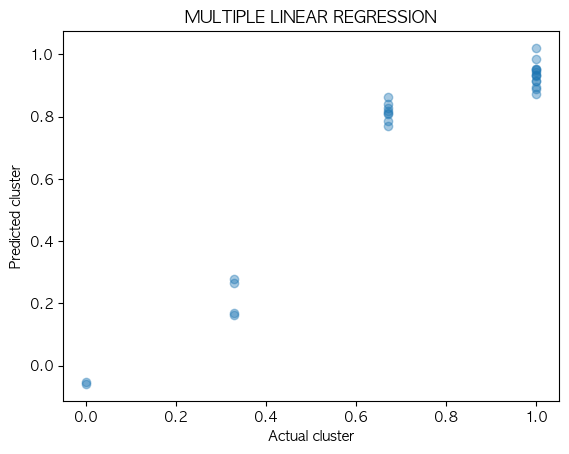

In [159]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual cluster")
plt.ylabel("Predicted cluster")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [160]:
print("Train :",mlr.score(x_train,y_train))
print("Test :",mlr.score(x_test,y_test))

Train : 0.8508657508681361
Test : 0.8832139194415567


In [161]:
print(up)
print(dw)

[]
[]


In [162]:
x_test.index

Int64Index([  1,  59,  14,  58,  11,  70,  54, 102,  18, 130, 122, 121, 111,
              5,   6,  65, 101,  69,  92,  68, 103, 117, 132,  93,  40,  73,
            125,  96],
           dtype='int64')

In [163]:
x_train.index

Int64Index([ 62,  98, 107,  86,  28,  74,  63,  33,  37,  27,
            ...
            106,  36,  34,  31,  60, 109,  55, 112, 126,  30],
           dtype='int64', length=108)

In [164]:
kop.iloc[x_train.index,:].mean()

년도             2.016389e+03
총인구            2.802089e+06
전출인구           4.026944e+05
출생아수           2.051074e+04
산부인과의원수        7.028704e+01
초등학생인원수        1.489245e+05
도매 및 소매업 신생    1.118566e+04
예금은행대출금액       7.440691e+04
예금액            6.445365e+04
cluster        8.218519e-01
dtype: float64

In [165]:
kop.iloc[x_test.index,:].mean()

년도             2.016929e+03
총인구            3.941173e+06
전출인구           5.705294e+05
출생아수           2.717854e+04
산부인과의원수        1.108571e+02
초등학생인원수        2.015237e+05
도매 및 소매업 신생    1.635875e+04
예금은행대출금액       1.370295e+05
예금액            1.231364e+05
cluster        7.385714e-01
dtype: float64

---
### 교차검증

In [166]:
kop_so =  kop

In [167]:
data =kop_so[['총인구','전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'	
       ]]
label = kop_so[['cluster']]

---
### 회귀 머신러닝 예측률 비교

In [168]:
# from sklearn import linear_model, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
# from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.naive_bayes import GaussianNB  # 회귀임?
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # 회귀임?
clf = [RandomForestRegressor(),LinearRegression(),KNeighborsRegressor(),SVR()
,DecisionTreeRegressor(),AdaBoostRegressor()]
# clf = LinearRegression()
df = ["RF","LR","KN","SVR","DeT","Ada"]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
i = 0
kfold = KFold(n_splits=6, shuffle=True)
for ml in clf:
    scores = cross_val_score(ml,data,label,cv=kfold)
    # print(df[i],"교차 검증 점수 : ", scores)
    print(df[i],"교차 검증 평균 : ", scores.mean())
    print("================================ \n")
    i+=1
# print(mlr.score(x_test,y_test))

RF 교차 검증 평균 :  0.9966421083775061

LR 교차 검증 평균 :  0.8630116397027697

KN 교차 검증 평균 :  1.0

SVR 교차 검증 평균 :  0.9069009462168193

DeT 교차 검증 평균 :  0.9878427021265442

Ada 교차 검증 평균 :  0.9856033401116254



---
### RandomForest로 타겟 예측해보기.

In [169]:
from sklearn.model_selection import train_test_split
rx_train, rx_test, ry_train, ry_test = train_test_split(kop[['전출인구']],kop.cluster,
random_state=0)
forest = RandomForestRegressor(n_estimators=100)

forest.fit(rx_train,ry_train)
print("훈련 세트 정확도: {:3f}".format(forest.score(rx_train,ry_train)))
print("테스트 세트 정확도: {:3f}".format(forest.score(rx_test,ry_test)))

훈련 세트 정확도: 0.998269
테스트 세트 정확도: 0.999989


In [170]:
kop[kop["시도"]=="서울특별시"]

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
18,2014,서울특별시,10103233,1661425,83711,392,457517,50223,494441.9,565416.1,0.33
35,2015,서울특별시,10022181,1726687,83005,389,450675,44599,525529.1,600391.1,0.33
52,2016,서울특별시,9930616,1655859,75536,388,436121,44997,544592.1,628071.1,0.33
69,2017,서울특별시,9857426,1571423,65389,388,428333,44574,569688.0,664687.0,0.33
86,2018,서울특별시,9765623,1549937,58074,394,424800,41812,607389.3,728762.8,0.33
103,2019,서울특별시,9729107,1476081,53673,391,422293,42897,641634.1,791160.6,0.33
120,2020,서울특별시,9668465,1642977,47445,385,409536,49581,726164.1,898371.8,0.33


> 실제로 타겟 데이터를 잘 예측하는지 INPUT 입력해보자

In [171]:
# forest.predict(12234630,1821303,112129,286,739619,49143,248468.3,13718.5)
# [[12234630,1821303,112129,286,739619,49143,248468.3,13718.5]]
# 10143645	1620640	84066	395	469392	48097	462443.1	532689.2
# 2013 : 0.3036
# 2020 : 0.3168
my_apartment =[[1050640]]  # 2020년 서울 데이터.
my_predict = forest.predict(my_apartment)
my_predict

array([0.3334])

---
### 정규화 하여 테스트 해보자

In [172]:
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,1.00
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,1.00
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,1.00
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,1.00


In [173]:
# 정규화를 진행할 컬럼 설정
col = ['총인구','전출인구','출생아수','산부인과의원수','초등학생인원수',"도매 및 소매업 신생","예금은행대출금액","예금액"]
x = kop[col].values
x

array([[1.2234630e+07, 1.8213030e+06, 1.1212900e+05, ..., 4.9143000e+04,
        2.4846830e+05, 1.3718500e+04],
       [1.0143645e+07, 1.6206400e+06, 8.4066000e+04, ..., 4.8097000e+04,
        4.6244310e+05, 5.3268920e+05],
       [3.3338200e+06, 4.2386400e+05, 2.9504000e+04, ..., 1.2612000e+04,
        5.7288600e+04, 6.7033000e+03],
       ...,
       [1.5428400e+06, 2.1789700e+05, 7.8350000e+03, ..., 5.5540000e+03,
        2.2831400e+04, 2.3634200e+04],
       [6.7463500e+05, 9.4736000e+04, 3.9890000e+03, ..., 2.8560000e+03,
        2.0182300e+04, 1.4025400e+04],
       [3.5583100e+05, 6.5909000e+04, 3.4680000e+03, ..., 1.3610000e+03,
        9.8647000e+03, 2.5173430e+05]])

In [174]:
# 최대값과 최소값 가져오기 instance
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaler= min_max_scaler.fit_transform(x.astype(float))
x_scaler

array([[0.91037982, 0.91727346, 0.98784524, ..., 0.77675027, 0.33995758,
        0.01377642],
       [0.75322035, 0.815367  , 0.73813888, ..., 0.76007271, 0.6356111 ,
        0.59233204],
       [0.2413905 , 0.20758574, 0.25264272, ..., 0.19429519, 0.07580053,
        0.00595578],
       ...,
       [0.10677954, 0.10298564, 0.05983058, ..., 0.08176151, 0.02819029,
        0.02483058],
       [0.04152482, 0.04043848, 0.02560863, ..., 0.03874424, 0.02452997,
        0.01411856],
       [0.01756336, 0.02579872, 0.02097274, ..., 0.01490776, 0.01027393,
        0.27911969]])

In [175]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaler, columns=col, index=kop.index)
crime_anal_norm

,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,0.910380,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.013776
1,0.753220,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.592332
2,0.241390,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.005956
3,0.255958,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.064875
4,0.178840,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.040335
...,...,...,...,...,...,...,...,...
131,0.111139,0.107325,0.066700,0.096692,0.102333,0.090515,0.036256,0.029329
132,0.100845,0.115946,0.056681,0.106870,0.095347,0.095330,0.051002,0.041654
133,0.106780,0.102986,0.059831,0.076336,0.087049,0.081762,0.028190,0.024831
134,0.041525,0.040438,0.025609,0.053435,0.043906,0.038744,0.024530,0.014119


In [176]:
col2 = ['cluster','년도','시도']
crime_anal_norm[col2] = kop[col2]
crime_anal_norm.head()

,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,년도,시도
0,0.910380,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.013776,0.00,2013,경기도
1,0.753220,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.592332,0.33,2013,서울특별시
2,0.241390,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.005956,0.67,2013,경상남도
3,0.255958,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.064875,0.67,2013,부산광역시
4,0.178840,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.040335,0.67,2013,대구광역시


In [177]:
Korea = crime_anal_norm

In [178]:
Korea

,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,년도,시도
0,0.910380,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.013776,0.00,2013,경기도
1,0.753220,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.592332,0.33,2013,서울특별시
2,0.241390,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.005956,0.67,2013,경상남도
3,0.255958,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.064875,0.67,2013,부산광역시
4,0.178840,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.040335,0.67,2013,대구광역시
...,...,...,...,...,...,...,...,...,...,...,...
131,0.111139,0.107325,0.066700,0.096692,0.102333,0.090515,0.036256,0.029329,1.00,2020,충청북도
132,0.100845,0.115946,0.056681,0.106870,0.095347,0.095330,0.051002,0.041654,1.00,2020,대전광역시
133,0.106780,0.102986,0.059831,0.076336,0.087049,0.081762,0.028190,0.024831,1.00,2020,강원도
134,0.041525,0.040438,0.025609,0.053435,0.043906,0.038744,0.024530,0.014119,1.00,2020,제주특별자치도


In [298]:
dore = kop[kop["시도"]=="세종특별자치시"]

---
### ======== 교차검증 K-Fold (NO 정규화) ==========

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
kfold = RepeatedKFold(n_splits = 5)
mlr = LinearRegression()
up = []
dw = []
x = kop[['전출인구','산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'	
              ]]
y = kop[['cluster']]
kfolder = cross_val_score(mlr, x, y, cv=kfold)
kfoldMean = cross_val_score(mlr, x, y, cv=kfold).mean()
print("* K-Fold 교차검증 (50): \n --------------------")
print( kfolder)
print("")
print("* K-Fold 교차검증 평균 : \n -------------------- \n","+", kfoldMean)
# 0.8462773909113632
# 0.8462773909113637

* K-Fold 교차검증 (50): 
 --------------------
[0.88089093 0.85150419 0.75563987 0.83631685 0.87759866 0.80054831
 0.91345591 0.83262201 0.84844713 0.83880398 0.8984039  0.75279597
 0.88110928 0.85021105 0.83647916 0.93234405 0.80810715 0.80805478
 0.89983617 0.53615707 0.84351045 0.85822771 0.81105811 0.83390258
 0.86405803 0.85840384 0.84950332 0.87782735 0.82163485 0.86685774
 0.82438886 0.89588746 0.85055636 0.8984773  0.69533257 0.88314615
 0.86460408 0.74498506 0.76513852 0.85845071 0.62756696 0.78716131
 0.86363219 0.91397264 0.89600744 0.93666511 0.6696849  0.84200531
 0.19309029 0.88524654]

* K-Fold 교차검증 평균 : 
 -------------------- 
 + 0.831295671409873


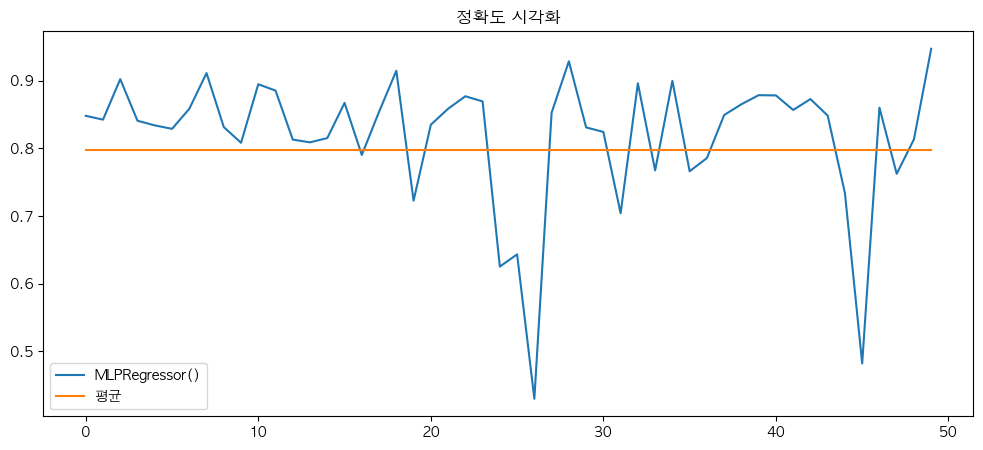

In [294]:
# 정확도 시각화
Means = []
ml_list = [LinearRegression()]
# 정확도 시각화
cv_list = {}
# for ml, scores in zip(ml_list, kfolder):
for i in range(50):
    Means.append(kfoldMean)
cv_list[ml] = kfolder
cv_list["평균"] = Means
cv_list
df = pd.DataFrame(cv_list)
df.plot(figsize=(12,5))
plt.title('정확도 시각화')
plt.show()

In [181]:
df

,AdaBoostRegressor(),평균
0,0.875143,0.837675
1,0.786698,0.837675
2,0.800413,0.837675
3,0.915522,0.837675
4,0.809965,0.837675
5,0.834947,0.837675
6,0.858397,0.837675
7,0.904850,0.837675
8,0.790351,0.837675
9,0.718485,0.837675


---
### 교차검증 K-Fold (정규화)

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
kfold = RepeatedKFold(n_splits = 5)
mlr = LinearRegression()
up = []
dw = []
x = Korea[['전출인구', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'	
              ]]
y = Korea[['cluster']]
print(" K-Fold 교차검증 평균 : \n", cross_val_score(mlr, x, y, cv=kfold).mean())

 K-Fold 교차검증 평균 : 
 0.8214858080786048


In [183]:
from sklearn.model_selection import train_test_split
x2 = Korea[['총인구','전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'
       ]]
# ,'예금은행대출금액','예금액'	
y2 = Korea[['cluster']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, test_size=0.2)

In [184]:
from sklearn.linear_model import LinearRegression
mlr2 = LinearRegression()
mlr2.fit(x2_train, y2_train) 

LinearRegression()

In [185]:
print("Train :",mlr2.score(x2_train,y2_train))
print("Test :",mlr2.score(x2_test,y2_test))

Train : 0.8969785943859105
Test : 0.8567246764084461


In [186]:
# from sklearn import linear_model, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.naive_bayes import GaussianNB  # 회귀임?
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # 회귀임?
clf = [RandomForestRegressor(),LinearRegression(),KNeighborsRegressor(),SVR()
,GaussianProcessRegressor(),DecisionTreeRegressor(),AdaBoostRegressor(),MLPRegressor()]
# clf = LinearRegression()
df = ["RF","LR","KN","SVR","Gau","DeT","Ada","MLP"]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
i = 0
kfold = KFold(n_splits=6, shuffle=True)
for ml in clf:
    scores = cross_val_score(ml,x2,y2,cv=kfold)
    print(df[i],"교차 검증 점수 : ", scores)
    print(df[i],"교차 검증 평균 : ", scores.mean())
    print("================================ \n")
    i+=1
# print(mlr.score(x_test,y_test))

RF 교차 검증 점수 :  [0.99757546 0.99745714 0.9997284  0.99958102 0.99256269 0.99890729]
RF 교차 검증 평균 :  0.9976353334615812

LR 교차 검증 점수 :  [0.90781322 0.81554119 0.83523242 0.74994471 0.9161436  0.93550249]
LR 교차 검증 평균 :  0.8600296059116953

KN 교차 검증 점수 :  [0.98294687 0.99105105 1.         0.99464992 1.         1.        ]
KN 교차 검증 평균 :  0.9947746393554957

SVR 교차 검증 점수 :  [0.9311436  0.9233895  0.95832153 0.90071189 0.95057649 0.96070771]
SVR 교차 검증 평균 :  0.9374751180327269

Gau 교차 검증 점수 :  [ 5.68340604e-01 -1.91767610e+01 -2.79532704e+01 -1.53314518e+03
 -7.48251039e+00 -2.51359597e+01]
Gau 교차 검증 평균 :  -268.72089065149254

DeT 교차 검증 점수 :  [1. 1. 1. 1. 1. 1.]
DeT 교차 검증 평균 :  1.0

Ada 교차 검증 점수 :  [1.         0.93777576 1.         1.         0.9270294  1.        ]
Ada 교차 검증 평균 :  0.9774675258340656

MLP 교차 검증 점수 :  [0.79900317 0.81761495 0.76400082 0.77932564 0.89535683 0.40801279]
MLP 교차 검증 평균 :  0.7438857011196339



In [187]:
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,1.00
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,1.00
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,1.00
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,1.00


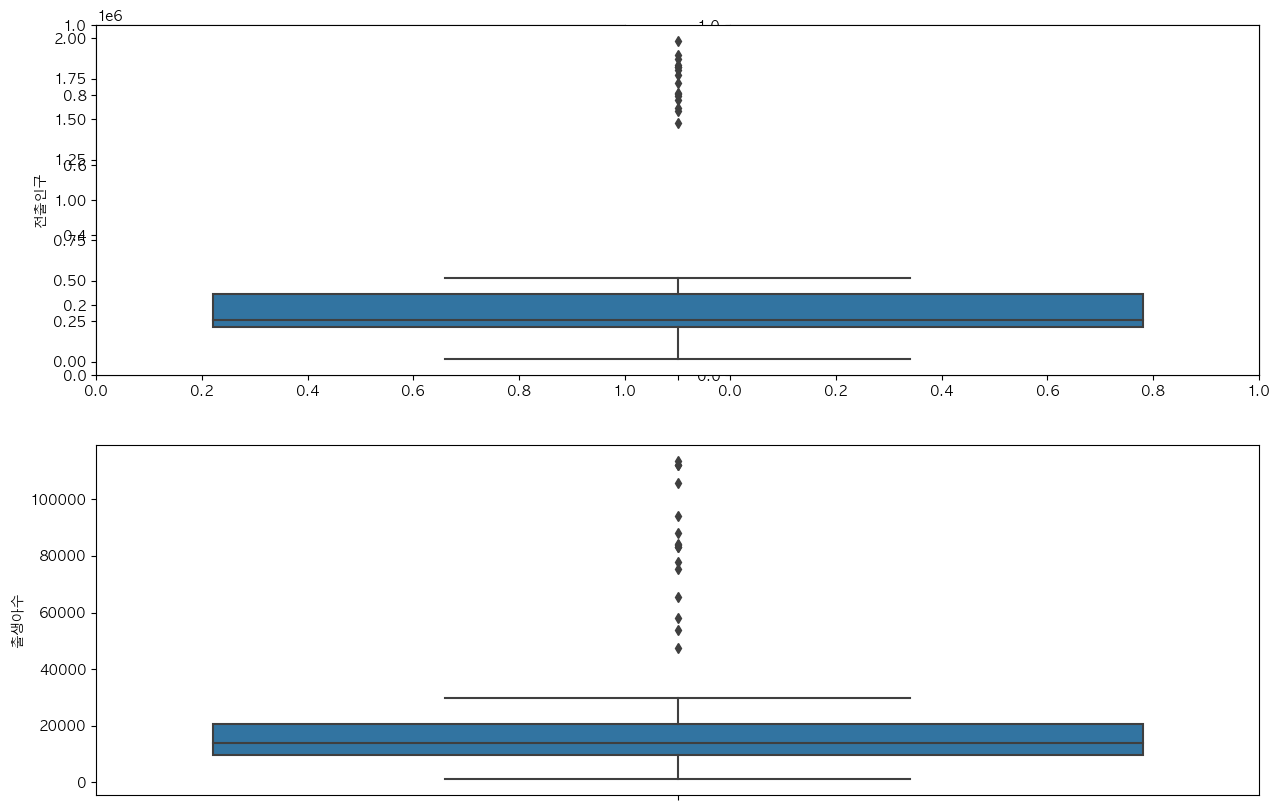

In [188]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
# ax3 = fig.add_subplot(2,3,3)
# ax4 = fig.add_subplot(2,3,4)
# ax5 = fig.add_subplot(2,3,5)
# axs = [ax1,ax2,ax3,ax4,ax5]
# col = ["전출인구","출생아수","산부인과의원수","초등학생인원수","도매 및 소매업 신생"]

# for i in range(5):
sns.boxplot(
    y='전출인구',
    data=kop,
    ax=fig.add_subplot(2,1,1)
)
# for i in range(5):
sns.boxplot(
    y='출생아수',
    data=kop,
    ax=fig.add_subplot(2,1,2)
)
plt.show()

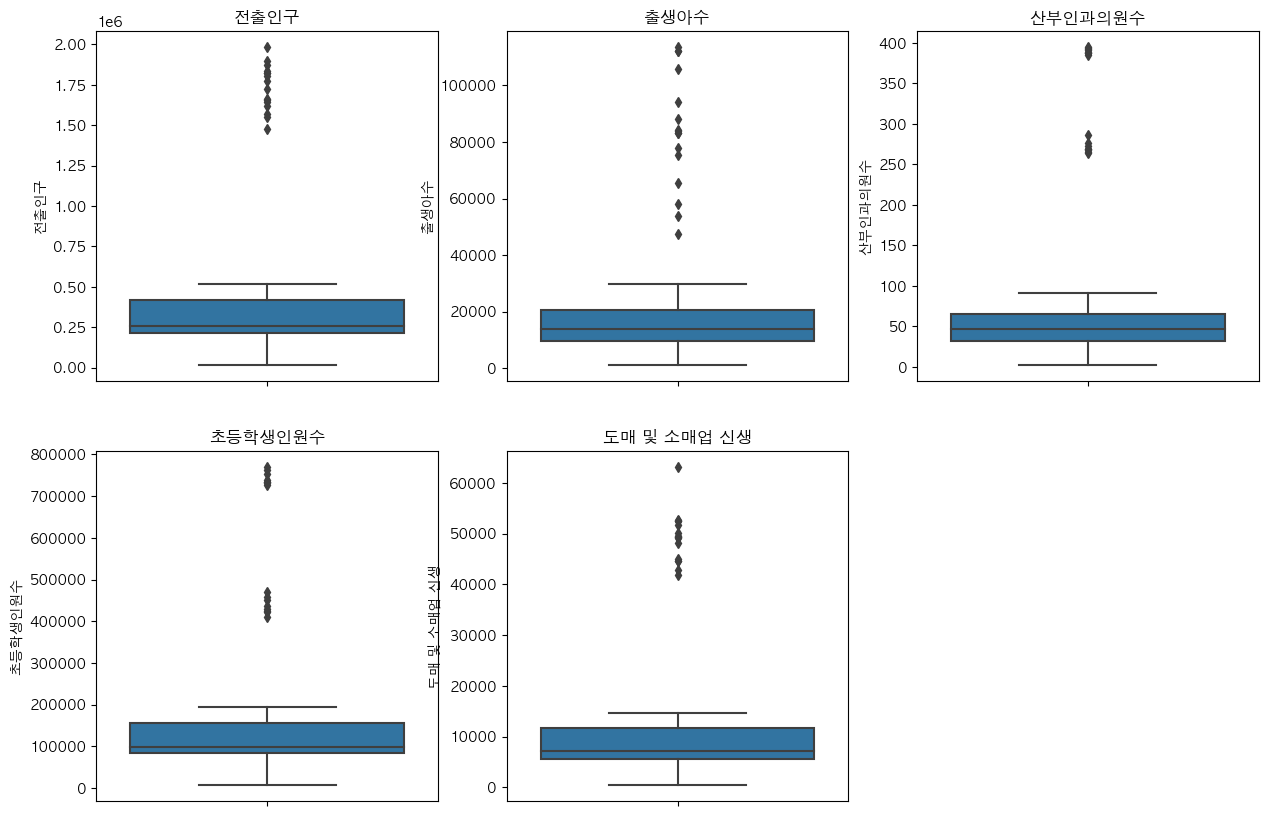

In [189]:
# 상자수염 boxplot
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
axs = [ax1,ax2,ax3,ax4,ax5]
col = ["전출인구","출생아수","산부인과의원수","초등학생인원수","도매 및 소매업 신생"]

sns.boxplot(
y="전출인구",
data=kop,
ax=ax1,
)
sns.boxplot(
y="출생아수",
data=kop,
ax=ax2,
)
sns.boxplot(
y="산부인과의원수",
data=kop,
ax=ax3,
)
sns.boxplot(
y="초등학생인원수",
data=kop,
ax=ax4,
)
sns.boxplot(
y="도매 및 소매업 신생",
data=kop,
ax=ax5,
)
ax1.set_title("전출인구")
ax2.set_title("출생아수")
ax3.set_title("산부인과의원수")
ax4.set_title("초등학생인원수")
ax5.set_title("도매 및 소매업 신생")


plt.show()

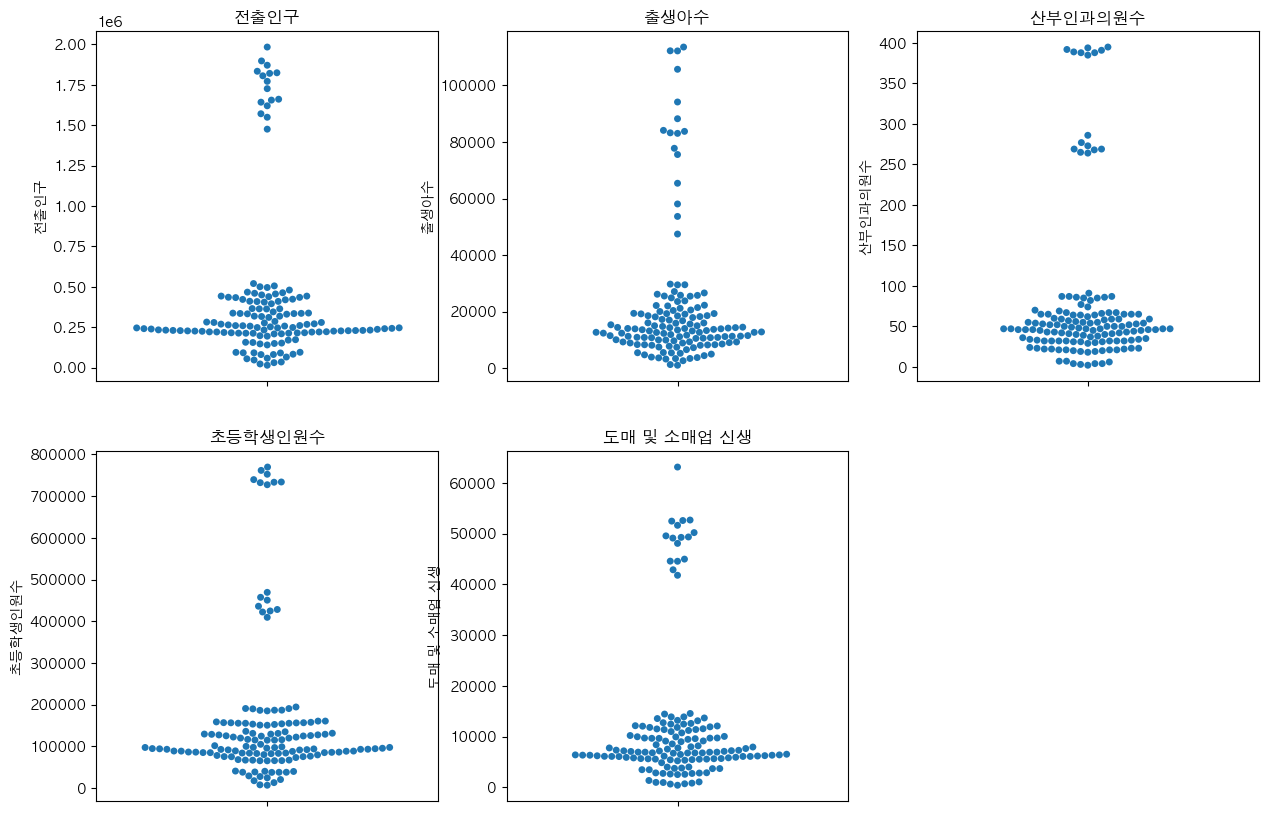

In [190]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

sns.swarmplot(
y="전출인구",
data=kop,
ax=ax1,
)
sns.swarmplot(
y="출생아수",
data=kop,
ax=ax2,
)
sns.swarmplot(
y="산부인과의원수",
data=kop,
ax=ax3,
)
sns.swarmplot(
y="초등학생인원수",
data=kop,
ax=ax4,
)
sns.swarmplot(
y="도매 및 소매업 신생",
data=kop,
ax=ax5,
)
ax1.set_title("전출인구")
ax2.set_title("출생아수")
ax3.set_title("산부인과의원수")
ax4.set_title("초등학생인원수")
ax5.set_title("도매 및 소매업 신생")

plt.xticks(rotation=45)
plt.show()

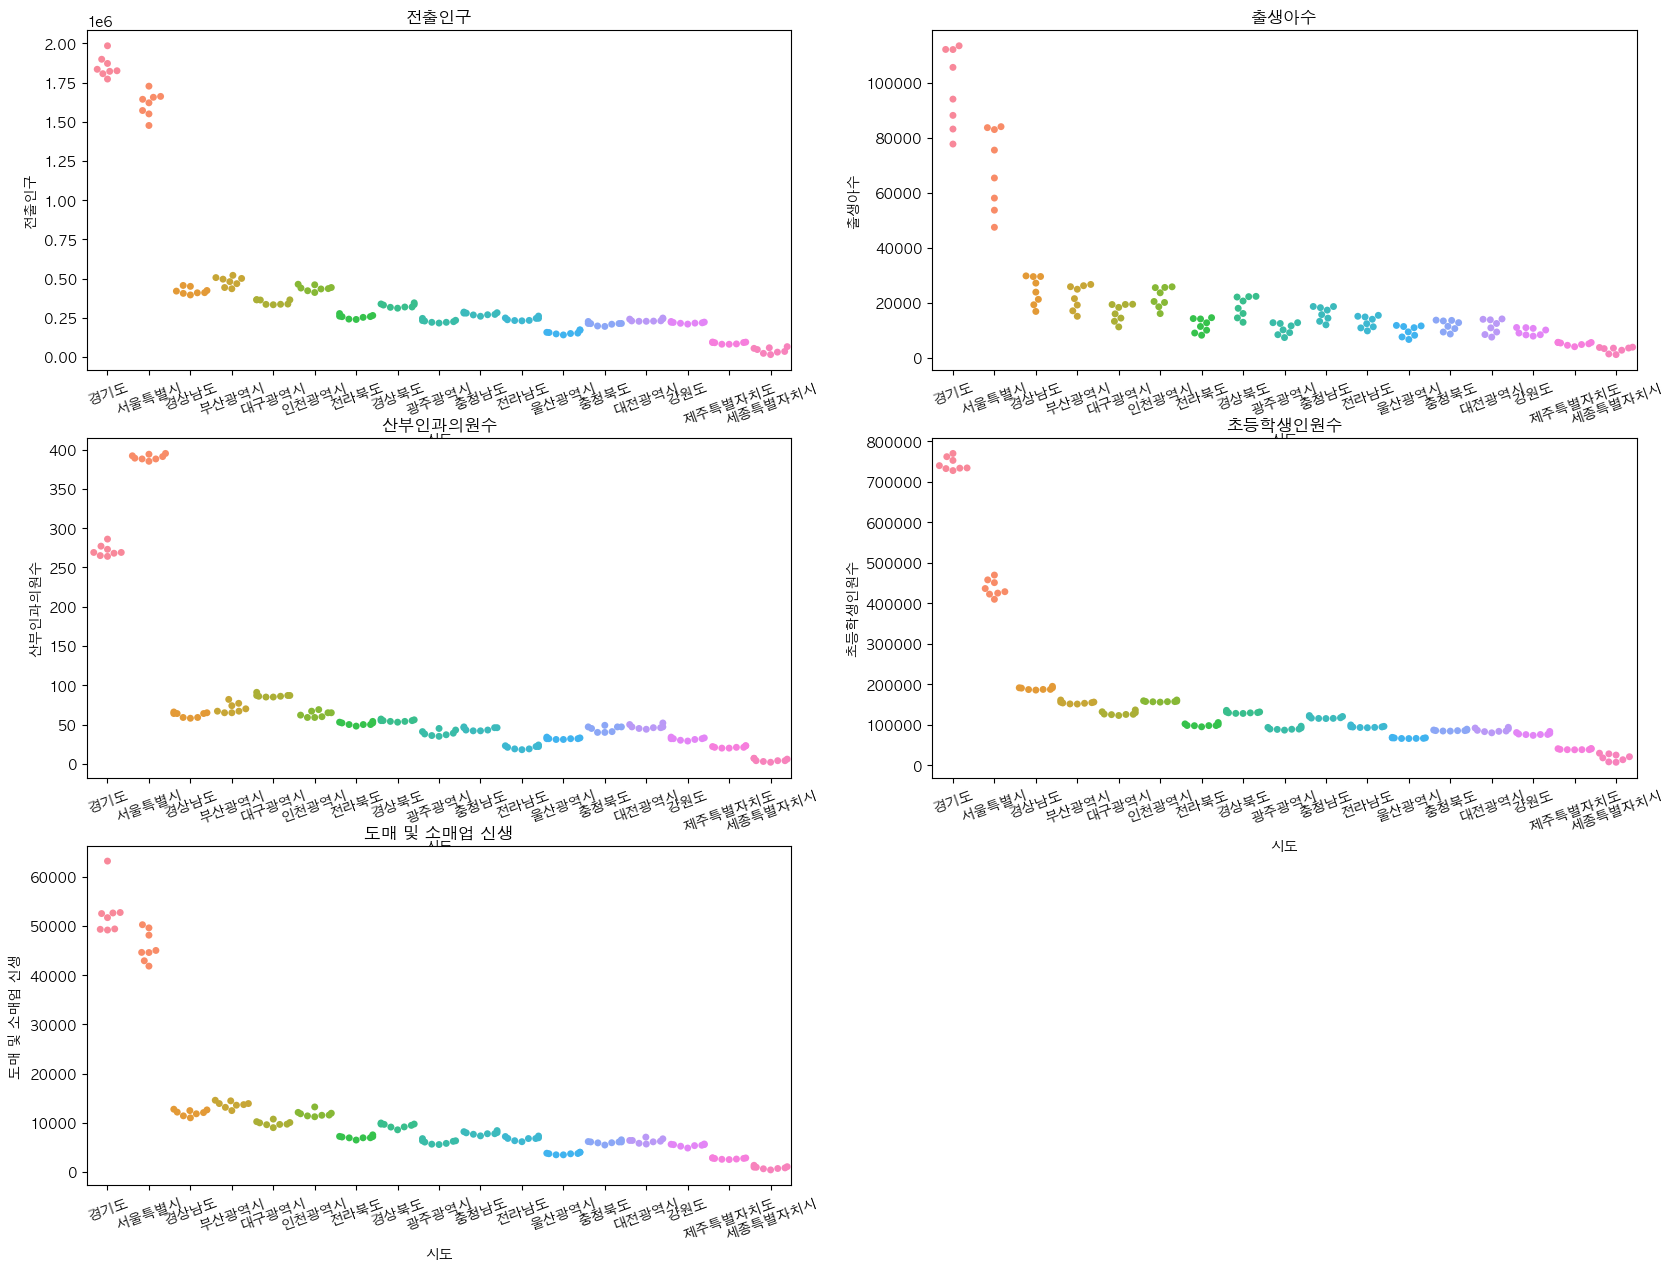

In [191]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)

sns.swarmplot(
x="시도",
y="전출인구",
data=kop,
ax=ax1,
)
sns.swarmplot(
x="시도",
y="출생아수",
data=kop,
ax=ax2,
)
sns.swarmplot(
x="시도",
y="산부인과의원수",
data=kop,
ax=ax3,
)
sns.swarmplot(
x="시도",
y="초등학생인원수",
data=kop,
ax=ax4,
)
sns.swarmplot(
x="시도",
y="도매 및 소매업 신생",
data=kop,
ax=ax5,
)
ax1.set_xticklabels(labels=pd.unique(kop.시도),rotation=20)
ax2.set_xticklabels(labels=pd.unique(kop.시도),rotation=20)
ax3.set_xticklabels(labels=pd.unique(kop.시도),rotation=20)
ax4.set_xticklabels(labels=pd.unique(kop.시도),rotation=20)
ax5.set_xticklabels(labels=pd.unique(kop.시도),rotation=20)
ax1.set_title("전출인구")
ax2.set_title("출생아수")
ax3.set_title("산부인과의원수")
ax4.set_title("초등학생인원수")
ax5.set_title("도매 및 소매업 신생")
# plt.xticks(rotation=15)
plt.show()

In [350]:
test = pd.read_csv("../../Data/04.통합.csv")

In [364]:
tset2 = test.sort_values(by=["년도","산부인과의원수"],ascending=False)
tset2

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인
120,2020,서울특별시,9668465,1642977,47445,385,409536,49581,726164.1,898371.8,366454
119,2020,경기도,13427014,1984199,77737,265,761731,63145,419831.8,24939.5,583462
123,2020,대구광역시,2418346,364083,11193,87,122587,9605,88740.3,57156.5,37398
122,2020,부산광역시,3391946,506176,15058,67,153527,14454,132190.5,101058.8,54914
124,2020,인천광역시,2942828,460304,16040,60,156928,13214,102078.5,51948.8,99212
...,...,...,...,...,...,...,...,...,...,...,...
14,2013,강원도,1542263,214931,10980,34,83187,5355,13259.9,14145.8,14724
11,2013,울산광역시,1156480,157185,11330,31,67156,3700,19560.1,14588.0,21655
10,2013,전라남도,1907172,246635,15401,24,99206,6356,15968.2,24216.2,25395
15,2013,제주특별자치도,593806,81028,5328,21,38235,2633,7325.0,1360.9,9434


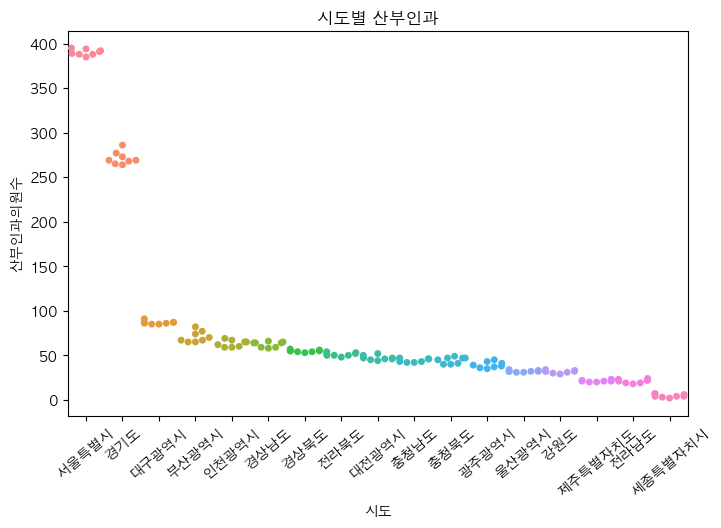

In [376]:
fig = plt.figure(figsize=(8,5))
sns.swarmplot(
x="시도",
y="산부인과의원수",
data=tset2,
)
ax1.set_xticklabels(labels=pd.unique(kop.시도),rotation=20)

plt.title("시도별 산부인과")

plt.xticks(rotation=40)
plt.show()

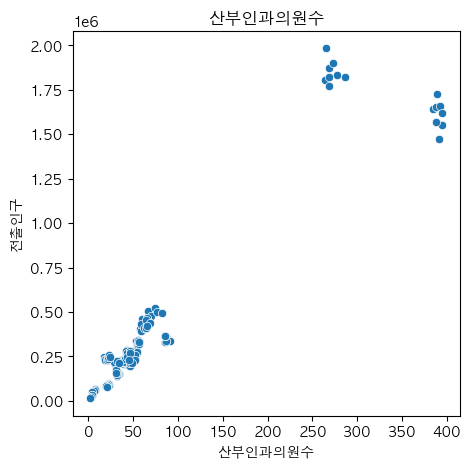

In [372]:
# test = pd.read_csv("../../Data/04.통합.csv")
tset2
fig = plt.figure(figsize=(5,5))
# ax2 = fig.add_subplot(3,2,2)

sns.scatterplot(
y="전출인구",
x="산부인과의원수",
# alpha=0.5,
data=tset2,
)
plt.title("산부인과의원수")
# plt.xticks(rotation=15)
plt.show()